# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        polynomial = 0
        
        for i in range(len(self.xk)):
          l_i = self.yk[i]
          x_i = self.xk[i]
          for x_j in self.xk:
            if x_j != x_i:
              l_i *= (x - x_j)/(x_i - x_j)
          polynomial += l_i
        
        return polynomial

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


m = 3


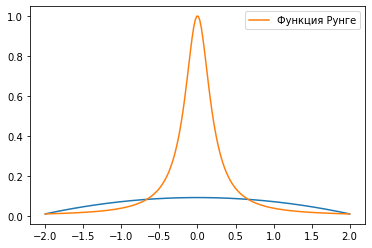


m = 5


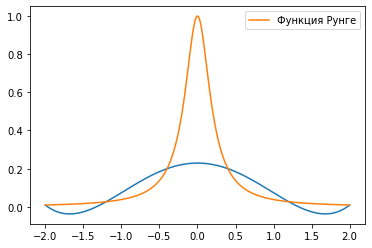


m = 7


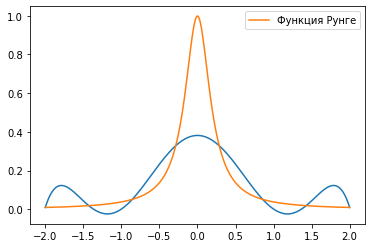


m = 11


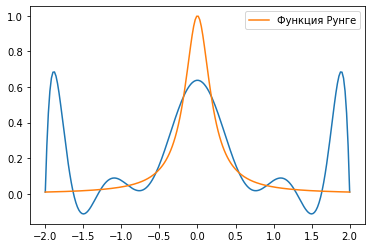


--------------------------------
m = 3


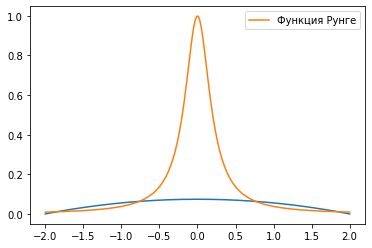


m = 5


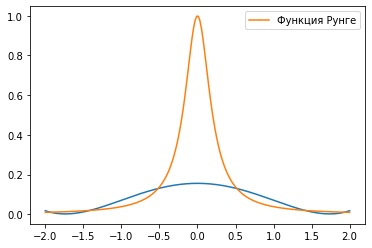


m = 7


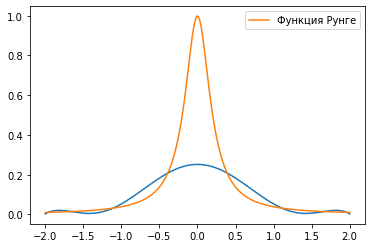


m = 11


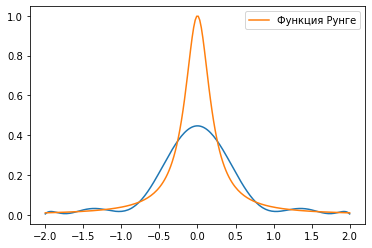

In [4]:
from matplotlib import pyplot as plt


for m in [3, 5, 7, 11]:
  print('m =', m)
  m += 1
  xx = np.linspace(-2, 2, m)
  yy = runge_func(xx)

  lagr = LagrangeInterpolator(xx, yy)

  xx = np.linspace(-2, 2, 200)
  plt.plot(xx, lagr(xx))
  plt.plot(xx, runge_func(xx), label = 'Функция Рунге')
  plt.legend()
  plt.show()
  print()

print('--------------------------------')

a, b = 2, -2
for m in [3, 5, 7, 11]:
  print('m =', m)
  m += 1
  xx = np.asarray([np.cos(np.pi/2 * (2*k + 1)/m) for k in range(m)], dtype=float)
  xx = (a + b)/2 + (b - a)/2 * xx
  yy = runge_func(xx)

  lagr = LagrangeInterpolator(xx, yy)

  xx = np.linspace(-2, 2, 200)
  plt.plot(xx, lagr(xx))
  plt.plot(xx, runge_func(xx), label = 'Функция Рунге')
  plt.legend()
  plt.show()
  print()